/var/folders/88/nsxfmy89127_4zqn71spykbm0000gn/T/ipykernel_17570/496128054.py:61: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



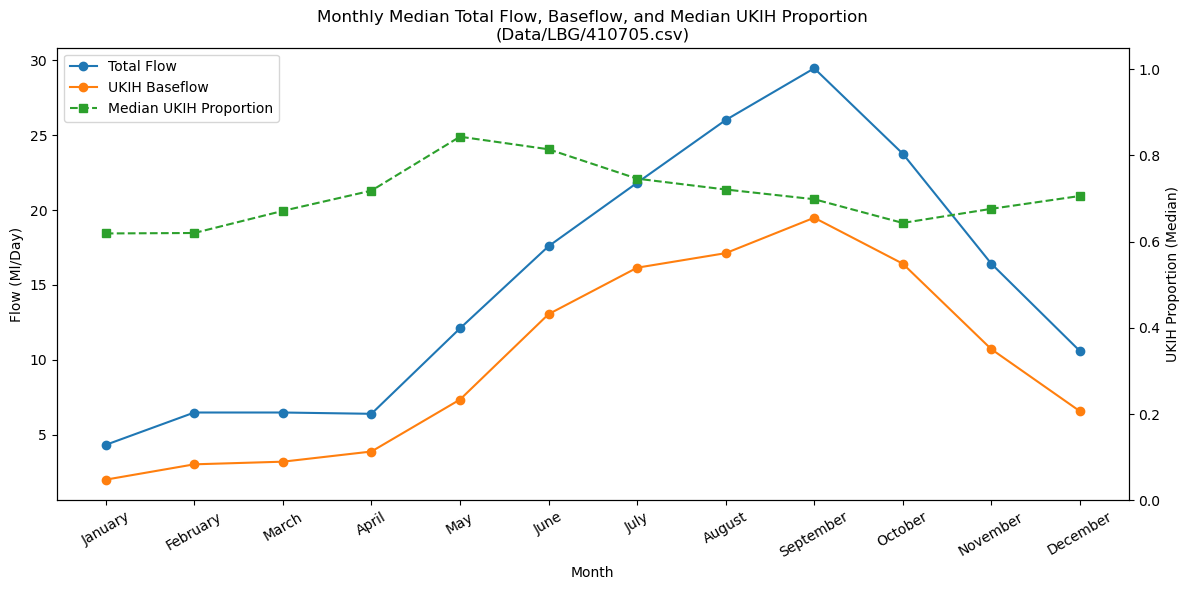

/var/folders/88/nsxfmy89127_4zqn71spykbm0000gn/T/ipykernel_17570/496128054.py:61: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



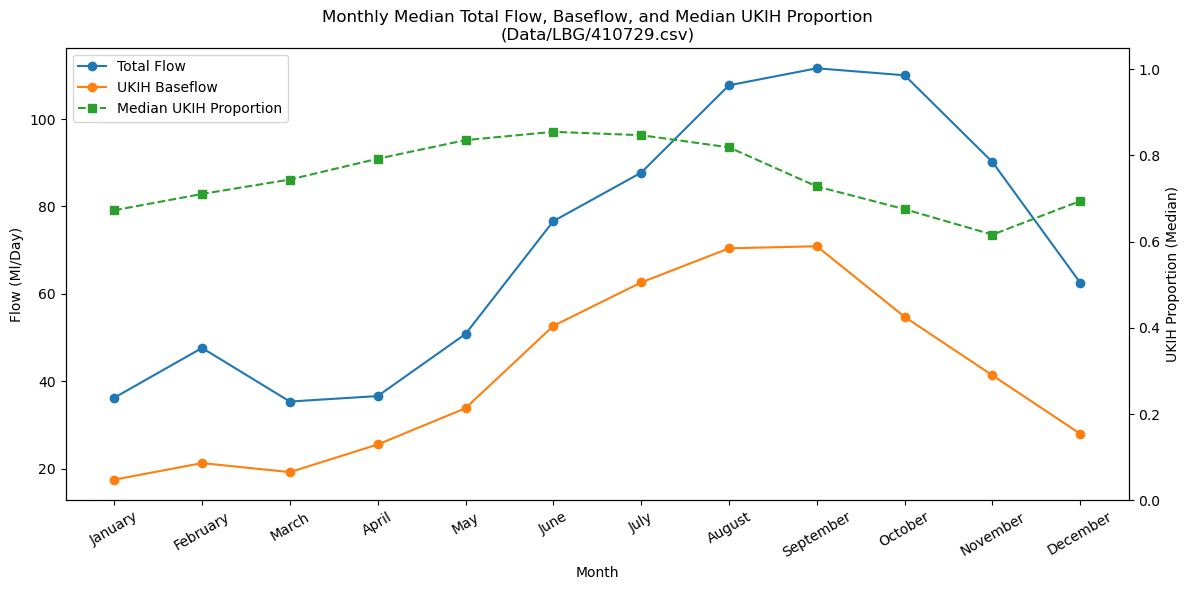

/var/folders/88/nsxfmy89127_4zqn71spykbm0000gn/T/ipykernel_17570/496128054.py:61: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



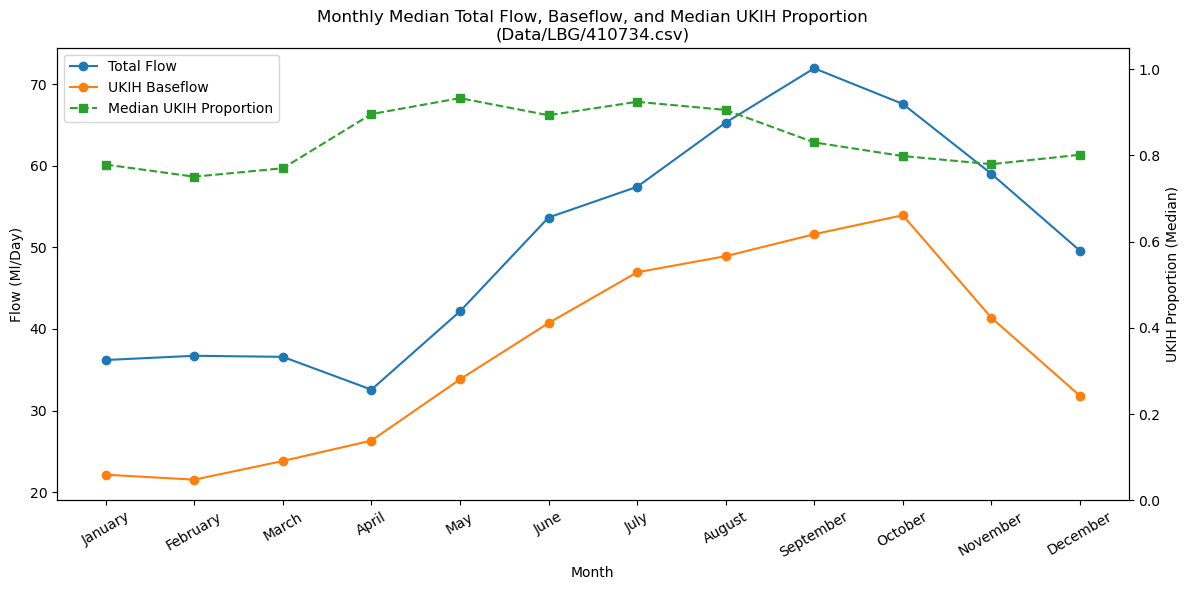

/var/folders/88/nsxfmy89127_4zqn71spykbm0000gn/T/ipykernel_17570/496128054.py:61: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



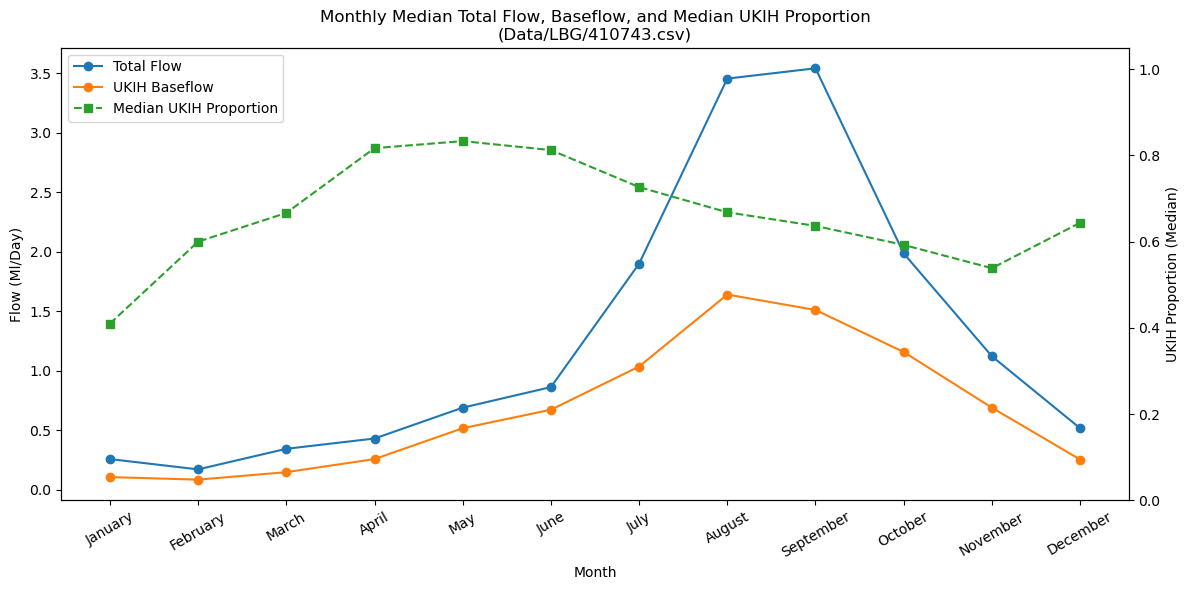

/var/folders/88/nsxfmy89127_4zqn71spykbm0000gn/T/ipykernel_17570/496128054.py:61: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



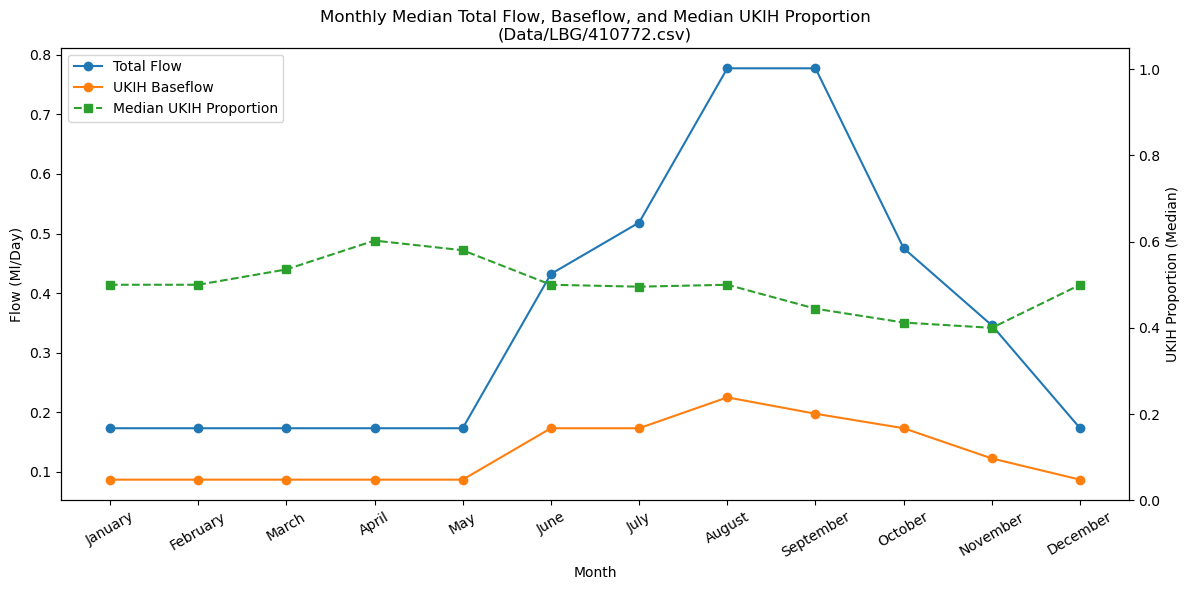

/var/folders/88/nsxfmy89127_4zqn71spykbm0000gn/T/ipykernel_17570/496128054.py:61: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



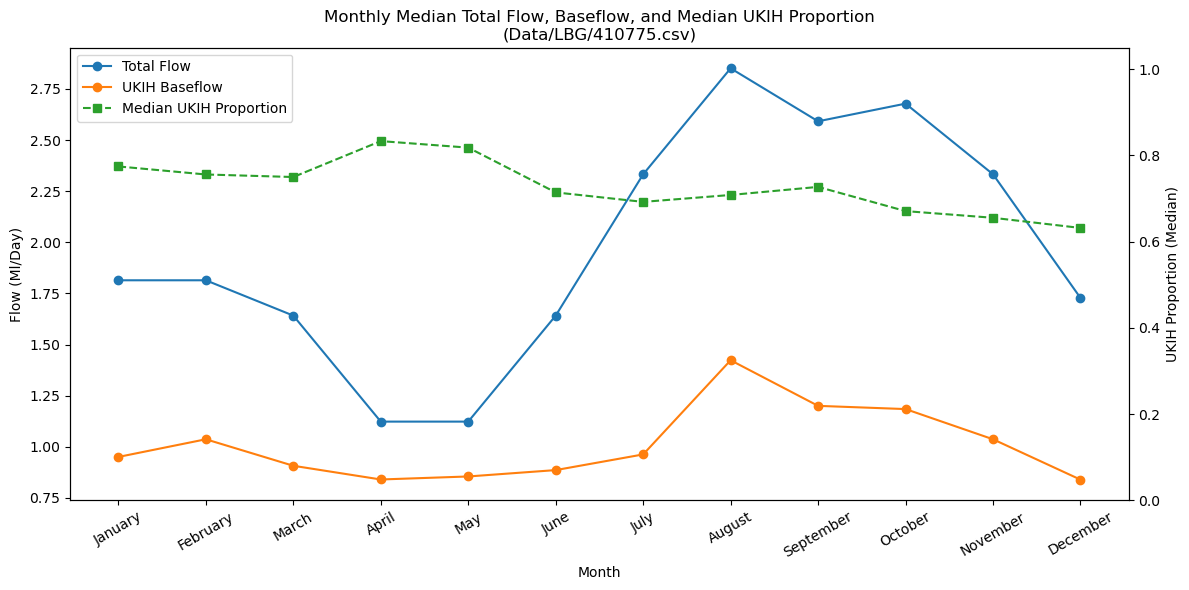

/var/folders/88/nsxfmy89127_4zqn71spykbm0000gn/T/ipykernel_17570/496128054.py:61: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



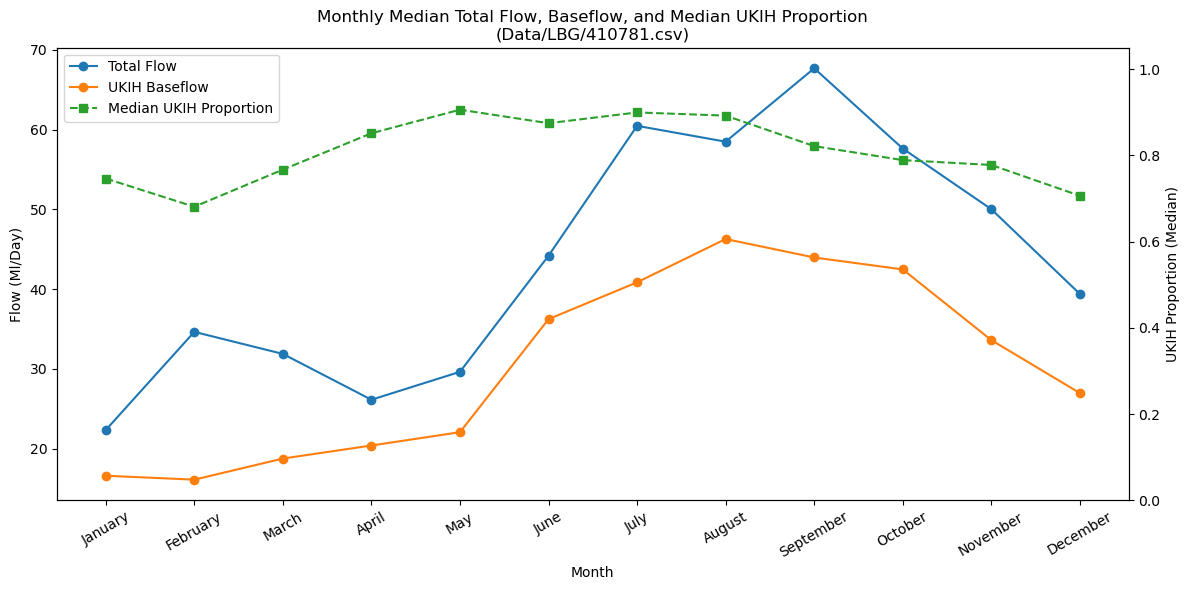

/var/folders/88/nsxfmy89127_4zqn71spykbm0000gn/T/ipykernel_17570/496128054.py:61: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



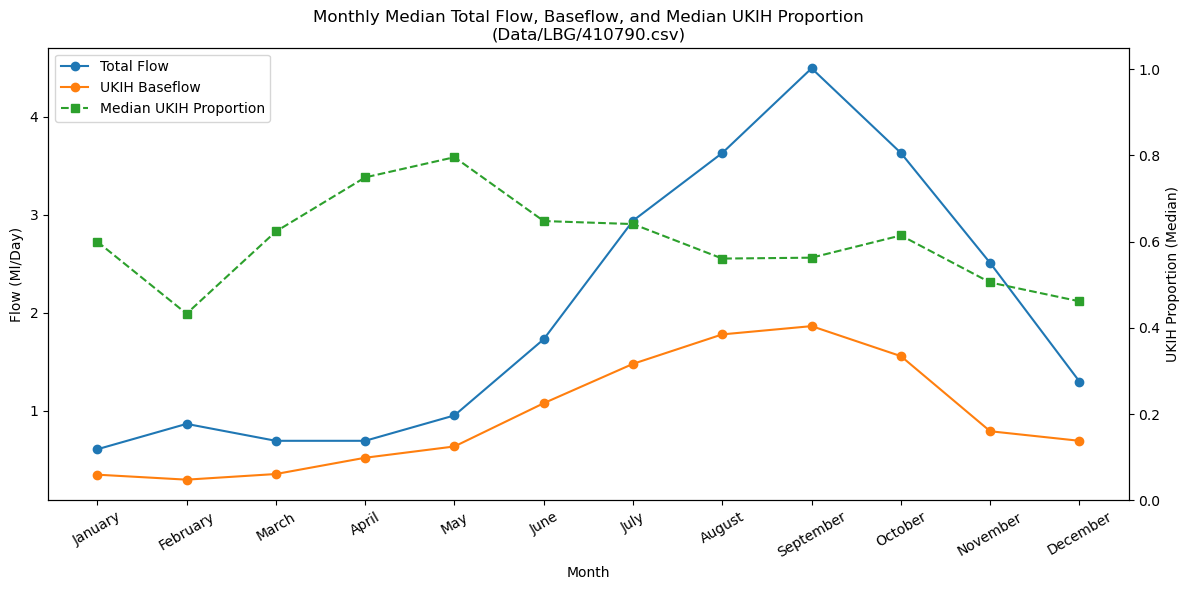

In [72]:
import os

data_dir = "Data/LBG/"
csv_files = [
    os.path.join(data_dir, fname)
    for fname in os.listdir(data_dir)
    if fname.lower().endswith(".csv")
]

# Column names for LBG data (different from the main dataset)
lbg_date_col = "Date"
lbg_flow_col = "Flow (ML/d)"

for csv_path in sorted(csv_files):
    plot_monthly_medians_suite(
        [csv_path],  # Wrapped in a list since function expects a list of files
        flow_col=lbg_flow_col,
        date_col=lbg_date_col,
        ukih_col_name=my_ukih_col_name,
        figsize=my_figsize
    )

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go

import baseflow
import baseflow.separation

import baseflow.utils

In [2]:
def plot_baseflow_separation(Q, baseflows, method_names=None, interactive=False):
    if method_names is None:
        method_names = list(baseflows.keys())

    if interactive:
        fig = make_subplots()
        fig.add_trace(go.Scatter(x=Q.index, y=Q.values, name='Streamflow', line=dict(width=2)))

        for method in method_names:
            if method in baseflows:
                fig.add_trace(go.Scatter(x=Q.index, y=baseflows[method], name=f'{method} Baseflow'))

        fig.update_layout(
            title='Baseflow Separation',
            xaxis_title='Date',
            yaxis_title='Flow',
            legend_title='Methods',
            hovermode="x unified",
            width=1100,
            height=600
        )

        return fig
    else:
        plt.figure(figsize=(12, 6))
        plt.plot(Q.index, Q.values, label='Observed Streamflow', alpha=0.7)

        for method in method_names:
            if method in baseflows:
                plt.plot(Q.index, baseflows[method], label=f'{method} Baseflow', alpha=0.7)

        plt.xlabel('Date')
        plt.ylabel('Flow')
        plt.title('Baseflow Separation')
        plt.legend()
        plt.grid(True)

        return plt.gcf()

In [4]:
# Read WOD data
df_410734 = pd.read_csv('Data/410734.csv', index_col=0)

In [7]:
df_410734
df_410734.index = pd.to_datetime(df_410734.index, format='mixed', dayfirst=True, errors='coerce')
df_410734 = df_410734[~df_410734.index.isna()]
df_410734

,Discharge (Ml/Day) Mean,QC,Discharge (Ml/Day) Minimum,QC.1,Discharge (Ml/Day) Maximum,QC.2
Datetime,,,,,,
1966-08-03,NaN,255,NaN,255,NaN,255
1966-08-04,57.706,1,54.609,1,59.584,1
1966-08-05,54.092,1,52.576,1,54.609,1
1966-08-06,51.190,1,48.468,1,52.576,1
1966-08-07,47.529,1,47.148,1,48.683,1
...,...,...,...,...,...,...
2025-11-30,19.017,6,17.948,6,19.852,6
2025-12-01,18.148,6,17.948,6,18.481,6
2025-12-02,18.947,6,18.481,6,19.575,6


In [9]:
Q_410734 = df_410734[df_410734.columns[0]]
Q_410734

Datetime
1966-08-03       NaN
1966-08-04    57.706
1966-08-05    54.092
1966-08-06    51.190
1966-08-07    47.529
               ...  
2025-11-30    19.017
2025-12-01    18.148
2025-12-02    18.947
2025-12-03    18.991
2025-12-04    18.736
Name: Discharge (Ml/Day) Mean, Length: 21674, dtype: float64

In [10]:
BF_410734 = baseflow.single(Q_410734)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [11]:
BF_410734

(                 UKIH      Local   Fixed   Slide         LH    Chapman  \
 Datetime                                                                 
 1966-08-04  47.998214  47.998214  46.637  47.529  47.998214  47.998214   
 1966-08-05  47.357610  47.357610  46.637  47.529  47.357610  47.353662   
 1966-08-06  46.929227  46.929227  46.637  47.529  46.929227  46.677461   
 1966-08-07  46.732178  46.732178  46.637  47.529  46.732178  45.970250   
 1966-08-08  46.683016  46.683016  46.637  46.637  46.683016  45.253289   
 ...               ...        ...     ...     ...        ...        ...   
 2025-11-30  18.180587  18.180587  18.148  18.148  18.180587  19.017000   
 2025-12-01  18.148000  18.148000  18.148  18.148  18.148000  18.148000   
 2025-12-02  18.177962  18.177962  18.148  18.148  18.177962  17.862699   
 2025-12-03  18.237290  18.237290  18.148  18.148  18.237290  17.593346   
 2025-12-04  18.284256  18.284256  18.148  18.148  18.284256  17.330957   
 
                    CM 

In [47]:
import plotly.graph_objects as go

def plot_410734_ukih(save_as_html=False, html_filename='410734_ukih_plot.html'):
    # Plot WOD
    flow_410734 = Q_410734
    ukih_410734 = BF_410734[0]['UKIH']

    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=flow_410734.index,
        y=flow_410734.values,
        mode='lines',
        name='410734 Flow',
        line=dict(color='black')
    ))

    fig.add_trace(go.Scatter(
        x=ukih_410734.index,
        y=ukih_410734.values,
        mode='lines',
        name='410734 UKIH Baseflow',
        line=dict(color='royalblue')
    ))

    fig.update_layout(
        title='410734 Empirical Flow vs UKIH Baseflow',
        xaxis_title='Date',
        yaxis_title='Flow',
        legend=dict(x=0, y=1),
        height=800,
    )

    if save_as_html:
        fig.write_html(html_filename)
        print(f"Plot saved as HTML: {html_filename}")
    else:
        fig.show()

# Usage: show in notebook
# plot_410734_ukih(save_as_html=False)

# To save as HTML:
plot_410734_ukih(save_as_html=True, html_filename='410734_ukih_plot.html')


Plot saved as HTML: 410734_ukih_plot.html


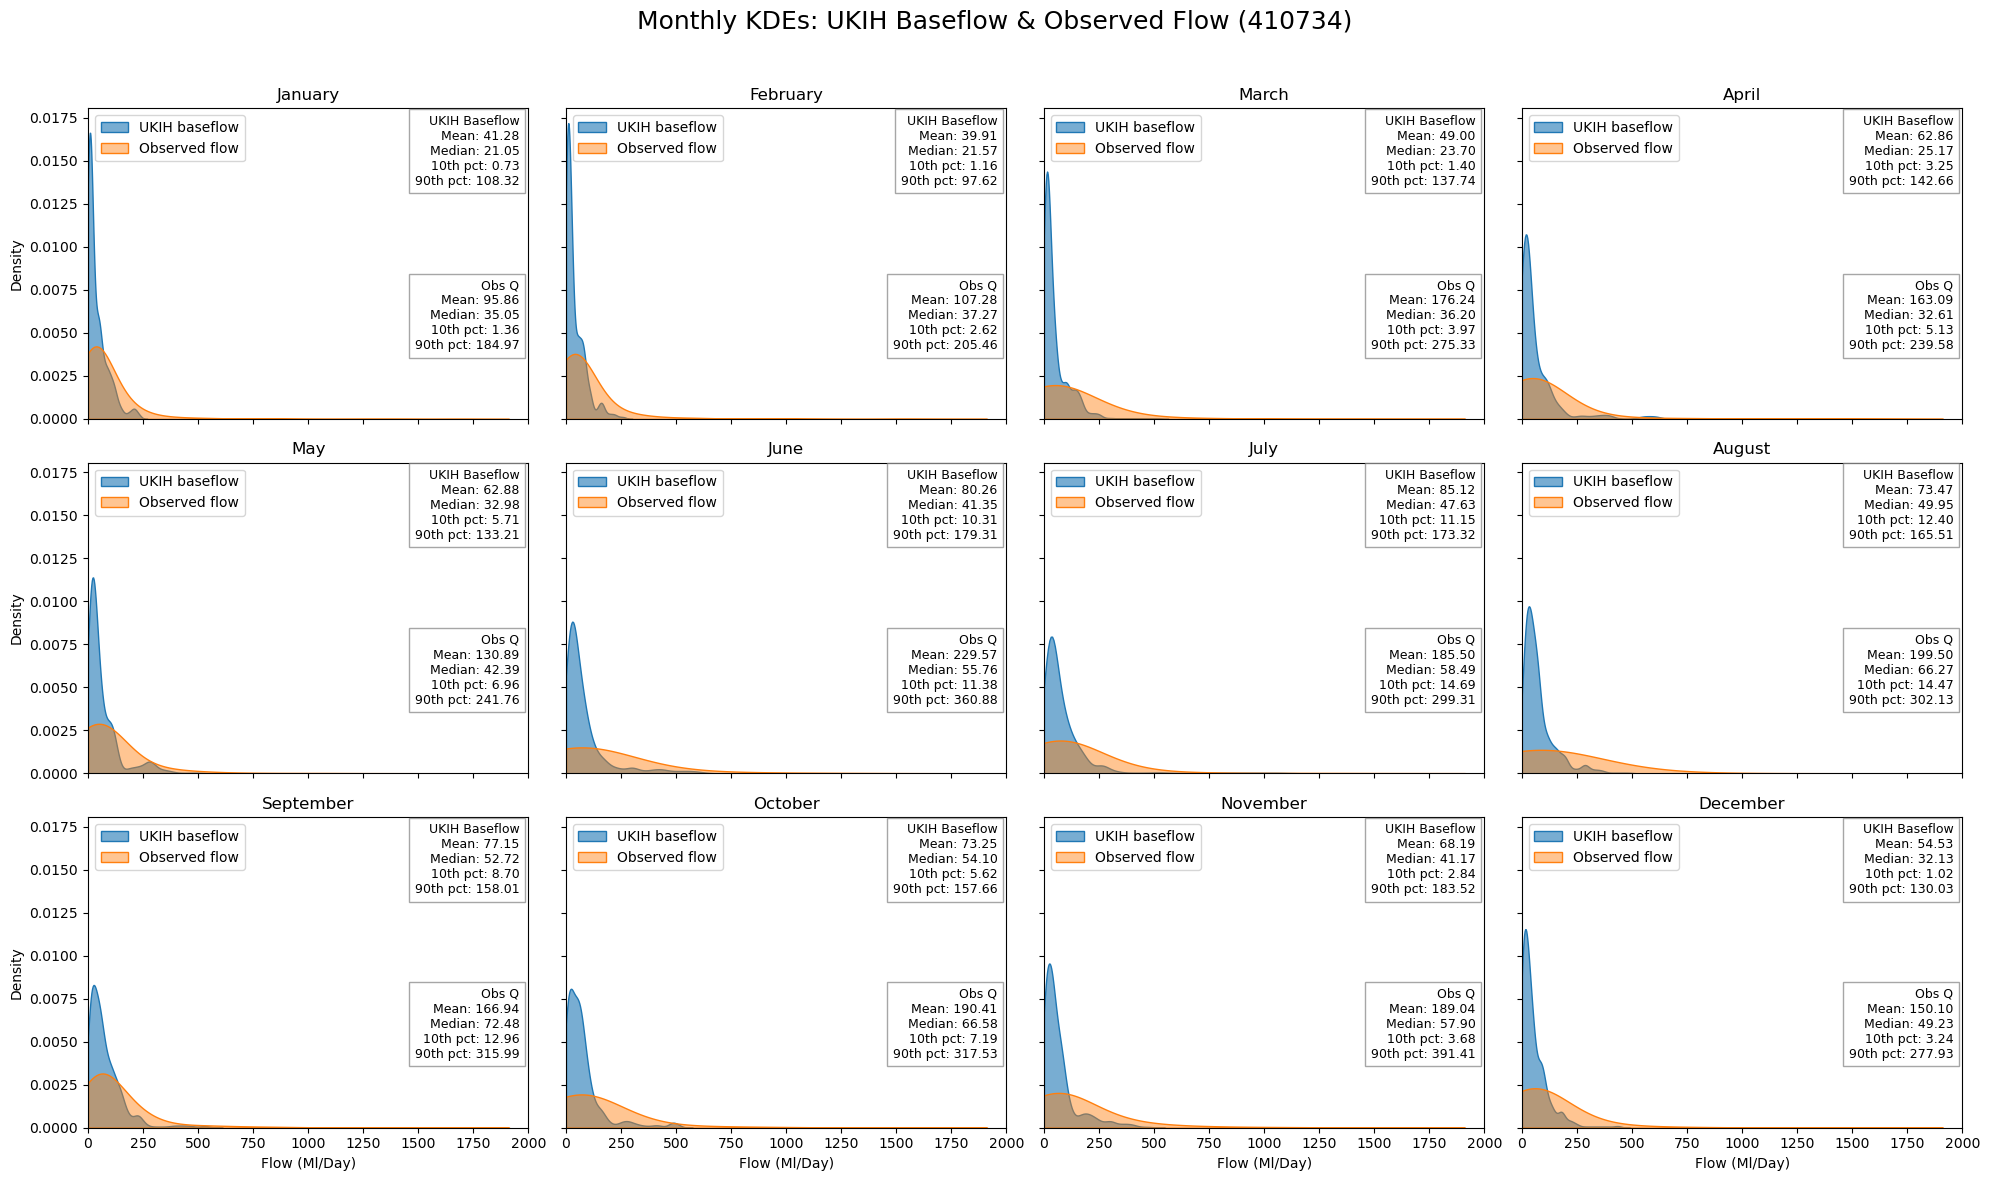

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Prepare the data for both baseflow and observed flow
df_ukih = ukih_410734.dropna().copy()
df_ukih = df_ukih.reset_index()
df_ukih['Month'] = df_ukih['Datetime'].dt.month_name()
df_ukih['Month_Num'] = df_ukih['Datetime'].dt.month

# Prepare observed flow (Q)
df_q = Q_410734.dropna().copy()
df_q = df_q.reset_index()
df_q = df_q.rename(columns={Q_410734.name: 'Q'})
df_q['Month'] = df_q['Datetime'].dt.month_name()
df_q['Month_Num'] = df_q['Datetime'].dt.month

# Sort months to keep order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Find reasonable x-axis limits based on percentiles (e.g., 1st, 99th percentiles of all observed & baseflow data)
all_flows = pd.concat([df_ukih['UKIH'], df_q['Q']])
x_min = np.percentile(all_flows, 0.5)
x_max = np.percentile(all_flows, 99.5)

# Create subplots, one for each month
fig, axes = plt.subplots(3, 4, figsize=(20, 12), sharex=True, sharey=True)
axes = axes.flatten()

# We'll manually collect the xticks and xticklabels from a reference axis (first subplot with data)
reference_xticks, reference_xticklabels = None, None

for idx, month in enumerate(month_order):
    ax = axes[idx]
    month_data_ukih = df_ukih[df_ukih['Month'] == month]
    month_data_q = df_q[df_q['Month'] == month]
    has_data = False
    if not month_data_ukih.empty:
        sns.kdeplot(
            data=month_data_ukih,
            x='UKIH',
            fill=True,
            common_norm=False,
            alpha=0.6,
            ax=ax,
            color='C0',
            label='UKIH baseflow',
            clip=(x_min, x_max)
        )
        # Compute stats for baseflow
        mean_val = month_data_ukih['UKIH'].mean()
        median_val = month_data_ukih['UKIH'].median()
        pct10 = np.percentile(month_data_ukih['UKIH'], 10)
        pct90 = np.percentile(month_data_ukih['UKIH'], 90)
        stats_txt = (
            f"UKIH Baseflow\n"
            f"Mean: {mean_val:.2f}\n"
            f"Median: {median_val:.2f}\n"
            f"10th pct: {pct10:.2f}\n"
            f"90th pct: {pct90:.2f}"
        )
        # Display textbox in top right
        ax.text(
            0.98, 0.98, stats_txt,
            transform=ax.transAxes, fontsize=9,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
        )
        has_data = True
    if not month_data_q.empty:
        sns.kdeplot(
            data=month_data_q,
            x='Q',
            fill=True,
            common_norm=False,
            alpha=0.45,
            ax=ax,
            color='C1',
            label='Observed flow',
            clip=(x_min, x_max)
        )
        # Compute stats for observed flow
        mean_q = month_data_q['Q'].mean()
        median_q = month_data_q['Q'].median()
        pct10_q = np.percentile(month_data_q['Q'], 10)
        pct90_q = np.percentile(month_data_q['Q'], 90)
        stats_txt_q = (
            f"Obs Q\n"
            f"Mean: {mean_q:.2f}\n"
            f"Median: {median_q:.2f}\n"
            f"10th pct: {pct10_q:.2f}\n"
            f"90th pct: {pct90_q:.2f}"
        )
        # Display second stats textbox, bottom right
        ax.text(
            0.98, 0.45, stats_txt_q,
            transform=ax.transAxes, fontsize=9,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
        )
        has_data = True
    ax.set_title(month)
    ax.set_xlabel('Flow (Ml/Day)')
    ax.set_ylabel('Density')
    ax.set_xlim(x_min, x_max)
    if has_data:
        ax.legend()
    # For the first axis with data, save the xticks and labels for reuse
    if reference_xticks is None and has_data:
        reference_xticks = ax.get_xticks()
        reference_xticklabels = [item.get_text() for item in ax.get_xticklabels()]

# Ensure all subplots show x axis tick labels, not just the bottom row
for ax in axes:
    if reference_xticks is not None:
        ax.set_xticks(reference_xticks)
        if reference_xticklabels and all(lbl != '' for lbl in reference_xticklabels):
            ax.set_xticklabels(reference_xticklabels, rotation=0)

plt.suptitle('Monthly KDEs: UKIH Baseflow & Observed Flow (410734)', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


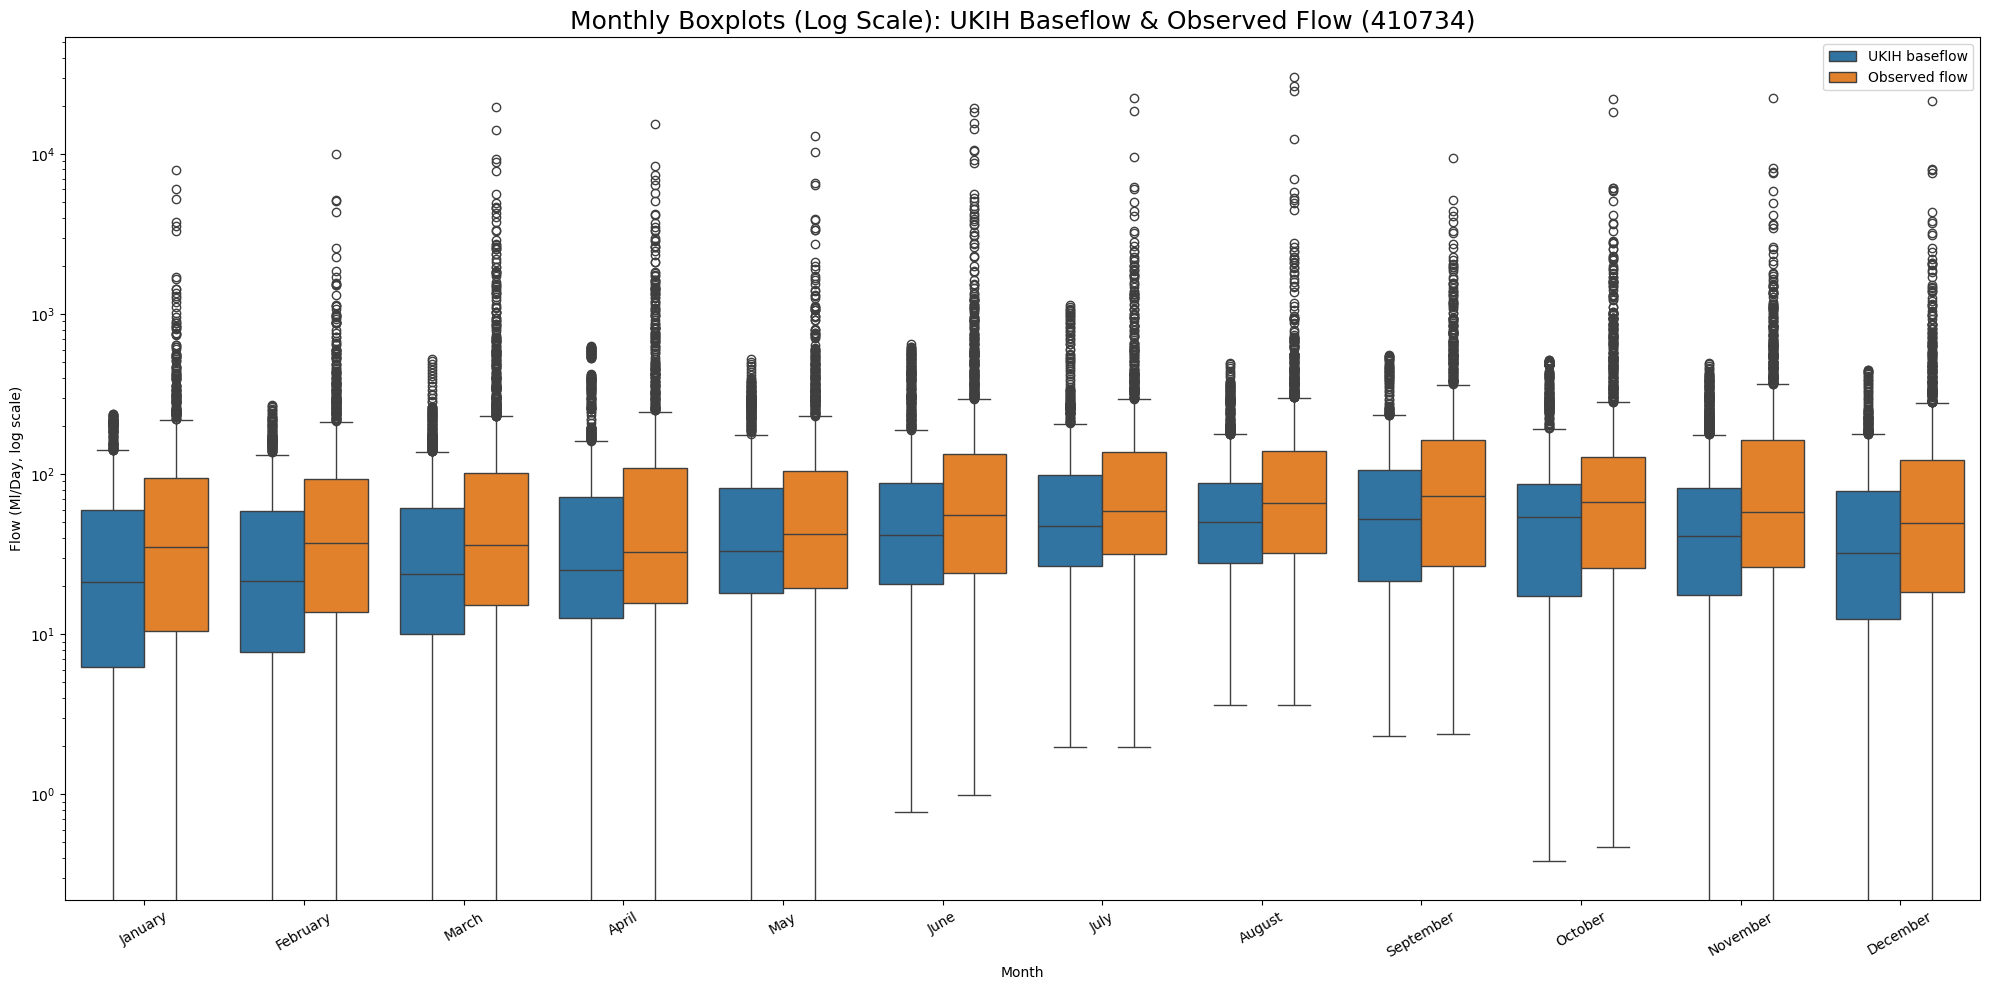

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Prepare the data for both baseflow and observed flow
df_ukih = ukih_410734.dropna().copy()
df_ukih = df_ukih.reset_index()
df_ukih['Month'] = df_ukih['Datetime'].dt.month_name()
df_ukih['Month_Num'] = df_ukih['Datetime'].dt.month

df_q = Q_410734.dropna().copy()
df_q = df_q.reset_index()
df_q = df_q.rename(columns={Q_410734.name: 'Q'})
df_q['Month'] = df_q['Datetime'].dt.month_name()
df_q['Month_Num'] = df_q['Datetime'].dt.month

# Prepare for consistent month order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Merge the two datasets for plotting
df_ukih_plot = df_ukih[['Month', 'Month_Num', 'UKIH']].copy()
df_ukih_plot['Type'] = 'UKIH baseflow'
df_ukih_plot = df_ukih_plot.rename(columns={'UKIH': 'Flow'})

df_q_plot = df_q[['Month', 'Month_Num', 'Q']].copy()
df_q_plot['Type'] = 'Observed flow'
df_q_plot = df_q_plot.rename(columns={'Q': 'Flow'})

df_plot = pd.concat([df_ukih_plot, df_q_plot], ignore_index=True)

# Set categorical order for months
df_plot['Month'] = pd.Categorical(df_plot['Month'], categories=month_order, ordered=True)

plt.figure(figsize=(20, 10))
ax = sns.boxplot(
    data=df_plot,
    x='Month',
    y='Flow',
    hue='Type',
    order=month_order,
    palette=['C0', 'C1']
)

ax.set_yscale('log')
plt.title('Monthly Boxplots (Log Scale): UKIH Baseflow & Observed Flow (410734)', fontsize=18)
plt.xlabel('Month')
plt.ylabel('Flow (Ml/Day, log scale)')
plt.legend(title='')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [37]:
flow_410734

Datetime
1966-08-03       NaN
1966-08-04    57.706
1966-08-05    54.092
1966-08-06    51.190
1966-08-07    47.529
               ...  
2025-11-30    19.017
2025-12-01    18.148
2025-12-02    18.947
2025-12-03    18.991
2025-12-04    18.736
Name: Discharge (Ml/Day) Mean, Length: 21674, dtype: float64

In [38]:
ukih_410734

Datetime
1966-08-04    47.998214
1966-08-05    47.357610
1966-08-06    46.929227
1966-08-07    46.732178
1966-08-08    46.683016
                ...    
2025-11-30    18.180587
2025-12-01    18.148000
2025-12-02    18.177962
2025-12-03    18.237290
2025-12-04    18.284256
Name: UKIH, Length: 21598, dtype: float64

In [41]:
merged_410734 = pd.concat([flow_410734, ukih_410734], axis=1)
merged_410734['UKIH_Proportion'] = merged_410734['UKIH'] / merged_410734['Discharge (Ml/Day) Mean']
merged_410734

,Discharge (Ml/Day) Mean,UKIH,UKIH_Proportion
Datetime,,,
1966-08-03,NaN,NaN,NaN
1966-08-04,57.706,47.998214,0.831772
1966-08-05,54.092,47.357610,0.875501
1966-08-06,51.190,46.929227,0.916766
1966-08-07,47.529,46.732178,0.983235
...,...,...,...
2025-11-30,19.017,18.180587,0.956018
2025-12-01,18.148,18.148000,1.000000
2025-12-02,18.947,18.177962,0.959411


/var/folders/88/nsxfmy89127_4zqn71spykbm0000gn/T/ipykernel_17570/3615860240.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



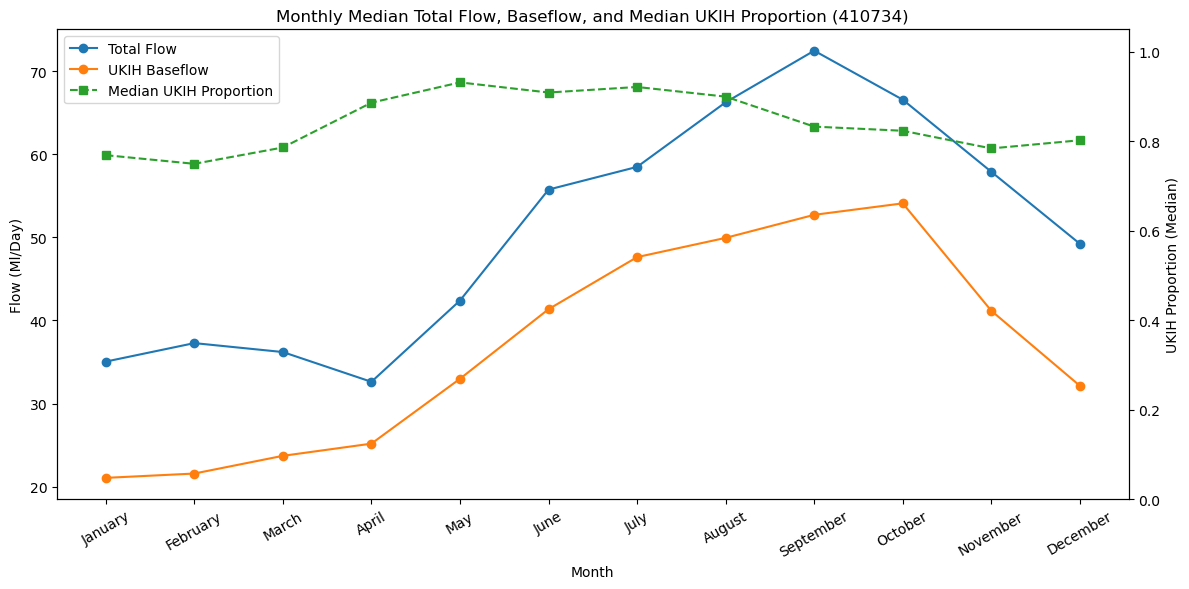

In [48]:
# Calculate monthly medians for total flow and baseflow
monthly_medians = merged_410734.groupby(merged_410734.index.strftime('%B'))[
    ['Discharge (Ml/Day) Mean', 'UKIH']
].median()

# Ensure order of months is calendar order
import calendar
month_order = list(calendar.month_name)[1:]  # calendar.month_name[0] is empty string
monthly_medians = monthly_medians.reindex(month_order)

# Calculate median UKIH proportion for each month (calendar order)
monthly_median_prop = merged_410734.groupby(merged_410734.index.strftime('%B'))['UKIH_Proportion'].median()
monthly_median_prop = monthly_median_prop.reindex(month_order)

fig, ax1 = plt.subplots(figsize=(12, 6))

lns1 = ax1.plot(monthly_medians.index, monthly_medians['Discharge (Ml/Day) Mean'], marker='o', label='Total Flow', color='C0')
lns2 = ax1.plot(monthly_medians.index, monthly_medians['UKIH'], marker='o', label='UKIH Baseflow', color='C1')
ax1.set_xlabel('Month')
ax1.set_ylabel('Flow (Ml/Day)')
ax1.set_xticklabels(monthly_medians.index, rotation=30)
ax1.tick_params(axis='y')
ax1.set_title('Monthly Median Total Flow, Baseflow, and Median UKIH Proportion (410734)')

ax2 = ax1.twinx()
lns3 = ax2.plot(monthly_median_prop.index, monthly_median_prop.values, marker='s', linestyle='--', color='C2', label='Median UKIH Proportion')
ax2.set_ylabel('UKIH Proportion (Median)')
ax2.set_ylim(0, 1.05)
ax2.tick_params(axis='y')

# Combine legends
lns = lns1 + lns2 + lns3
labels = [l.get_label() for l in lns]
ax1.legend(lns, labels, loc='upper left')

plt.tight_layout()
plt.show()


In [70]:
def plot_monthly_medians_suite(csv_files, date_col='Date', flow_col=None,
                              ukih_col_name='UKIH', figsize=(12,6)):
    """
    For each CSV file in csv_files, computes UKIH baseflow separation
    using the baseflow.single method and produces a
    monthly median plot of Total Flow, UKIH Baseflow, and Proportion as in cell 14.

    Args:
        csv_files: list of file paths (str) to CSVs, each with a date column and a discharge column.
        date_col: name of the datetime column in the input files.
        flow_col: unused; always uses the second column from CSV as flow.
        ukih_col_name: name for new baseflow column in dataframe.
        figsize: tuple, for each plot

    Returns: None (shows plots)
    """
    import pandas as pd
    import calendar
    import matplotlib.pyplot as plt
    import baseflow

    for csv_file in csv_files:
        df = pd.read_csv(csv_file)
        # Second column is always assumed to be the flow/discharge column
        all_cols = df.columns.tolist()
        # Find flow column programmatically as the second column (first is date)
        if len(all_cols) < 2:
            raise ValueError(f"File {csv_file} does not have at least two columns")
        flow_col_name_actual = all_cols[1]
        # Strip whitespace from date column and parse datetime (dayfirst for DD/MM/YYYY format)
        df[date_col] = df[date_col].astype(str).str.strip()
        df[date_col] = pd.to_datetime(df[date_col], dayfirst=True)
        df = df.set_index(date_col)
        df = df.sort_index()

        Q = df[flow_col_name_actual].copy()
        # Compute UKIH baseflow using the baseflow package
        BF_result = baseflow.single(Q)
        BF_df = BF_result[0]  # Extract the DataFrame from the tuple
        df[ukih_col_name] = BF_df['UKIH']

        # Compute UKIH baseflow proportion
        df[f'{ukih_col_name}_Proportion'] = df[ukih_col_name] / df[flow_col_name_actual]

        # Calendar month name order
        month_order = list(calendar.month_name)[1:]  # Jan...Dec

        monthly_medians = df.groupby(df.index.strftime('%B'))[
            [flow_col_name_actual, ukih_col_name]
        ].median()
        monthly_medians = monthly_medians.reindex(month_order)

        monthly_median_prop = df.groupby(df.index.strftime('%B'))[f'{ukih_col_name}_Proportion'].median()
        monthly_median_prop = monthly_median_prop.reindex(month_order)

        fig, ax1 = plt.subplots(figsize=figsize)
        lns1 = ax1.plot(monthly_medians.index, monthly_medians[flow_col_name_actual], marker='o', label='Total Flow', color='C0')
        lns2 = ax1.plot(monthly_medians.index, monthly_medians[ukih_col_name], marker='o', label='UKIH Baseflow', color='C1')
        ax1.set_xlabel('Month')
        ax1.set_ylabel('Flow (Ml/Day)')
        ax1.set_xticklabels(monthly_medians.index, rotation=30)
        ax1.tick_params(axis='y')
        ax1.set_title(f'Monthly Median Total Flow, Baseflow, and Median UKIH Proportion\n({csv_file})')
        ax2 = ax1.twinx()
        lns3 = ax2.plot(monthly_median_prop.index, monthly_median_prop.values, marker='s', linestyle='--', color='C2', label='Median UKIH Proportion')
        ax2.set_ylabel('UKIH Proportion (Median)')
        ax2.set_ylim(0, 1.05)
        ax2.tick_params(axis='y')
        # Combine legends
        lns = lns1 + lns2 + lns3
        labels = [l.get_label() for l in lns]
        ax1.legend(lns, labels, loc='upper left')
        plt.tight_layout()
        plt.show()


/var/folders/88/nsxfmy89127_4zqn71spykbm0000gn/T/ipykernel_17570/496128054.py:61: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



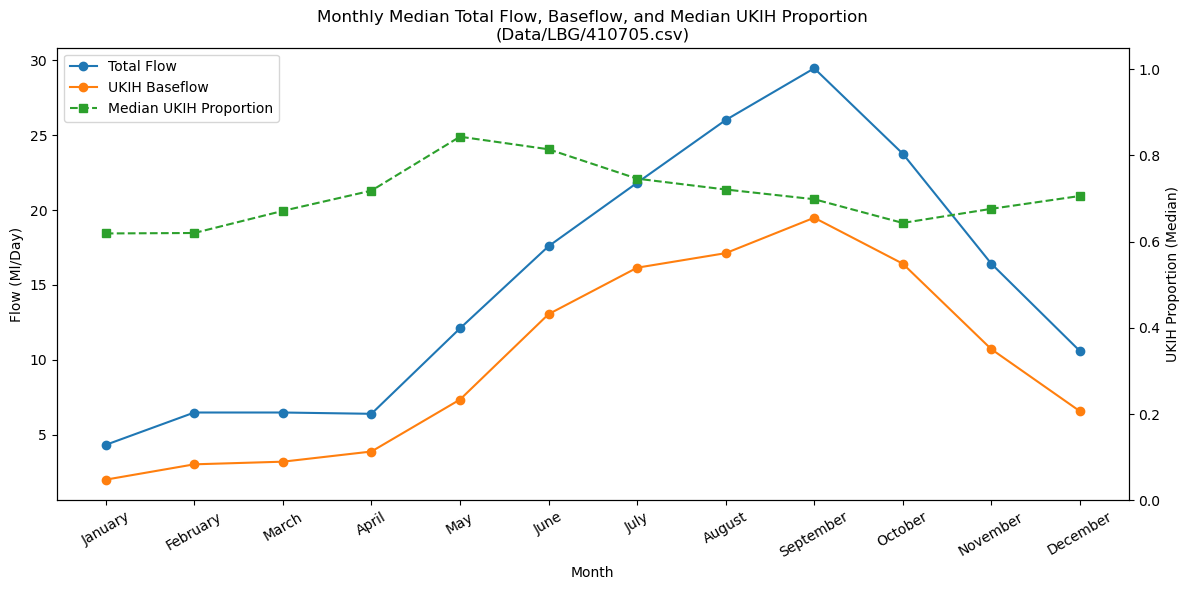

/var/folders/88/nsxfmy89127_4zqn71spykbm0000gn/T/ipykernel_17570/496128054.py:61: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



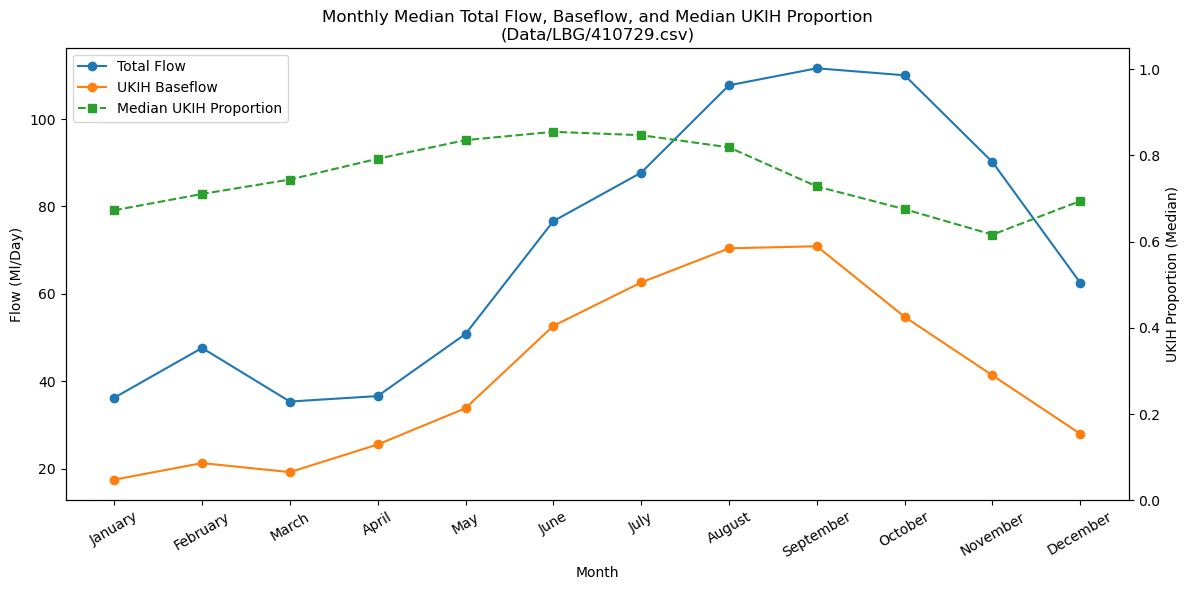

/var/folders/88/nsxfmy89127_4zqn71spykbm0000gn/T/ipykernel_17570/496128054.py:61: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



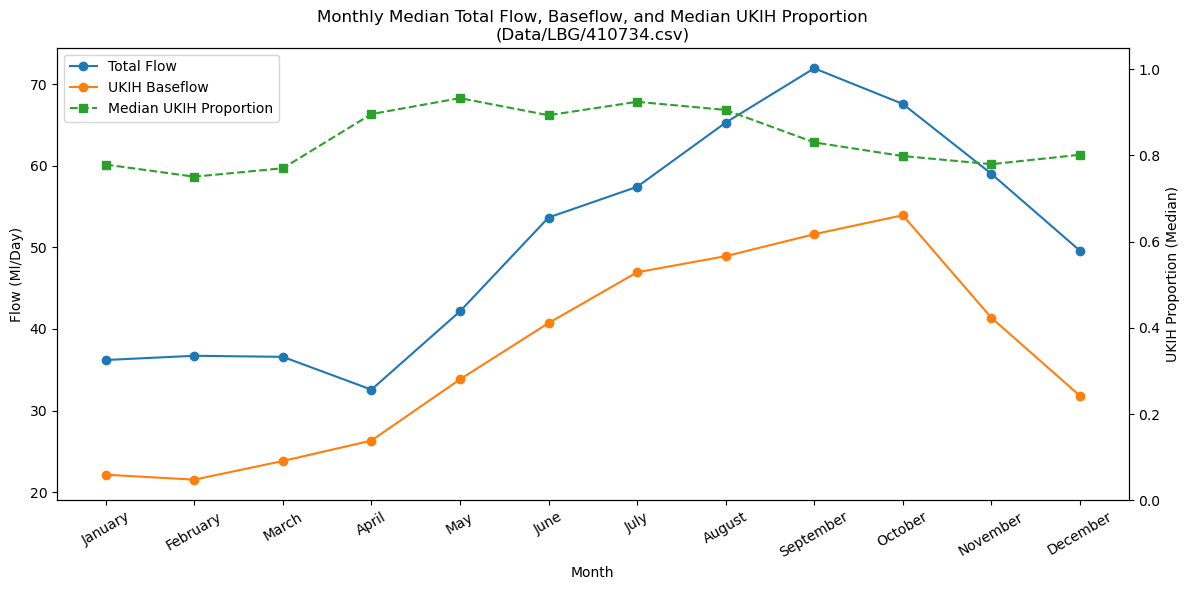

/var/folders/88/nsxfmy89127_4zqn71spykbm0000gn/T/ipykernel_17570/496128054.py:61: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



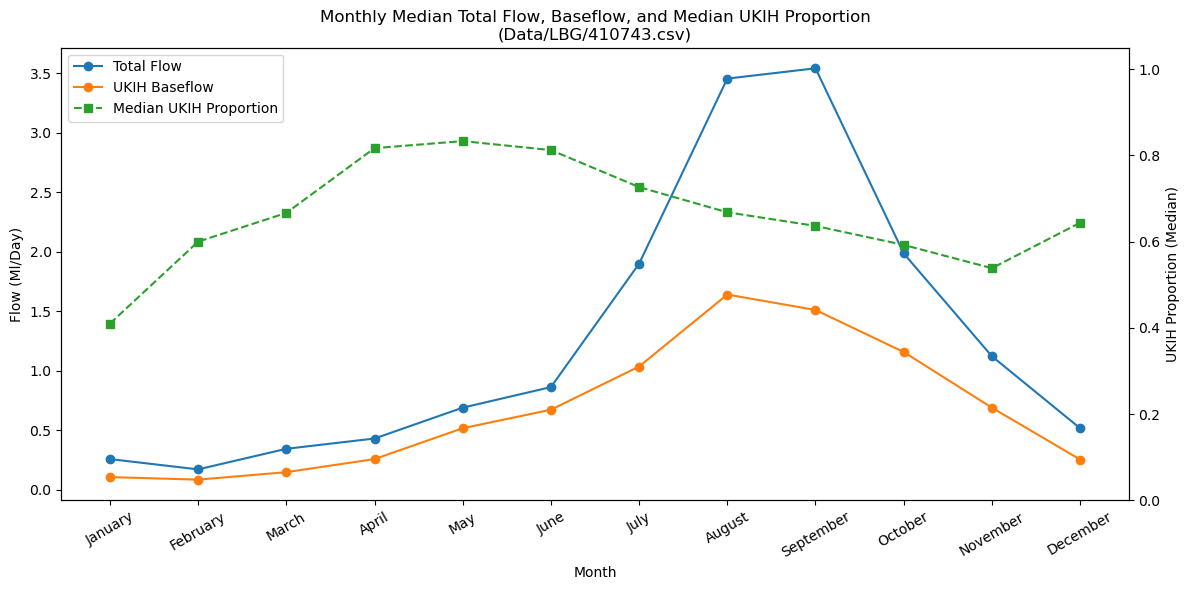

/var/folders/88/nsxfmy89127_4zqn71spykbm0000gn/T/ipykernel_17570/496128054.py:61: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



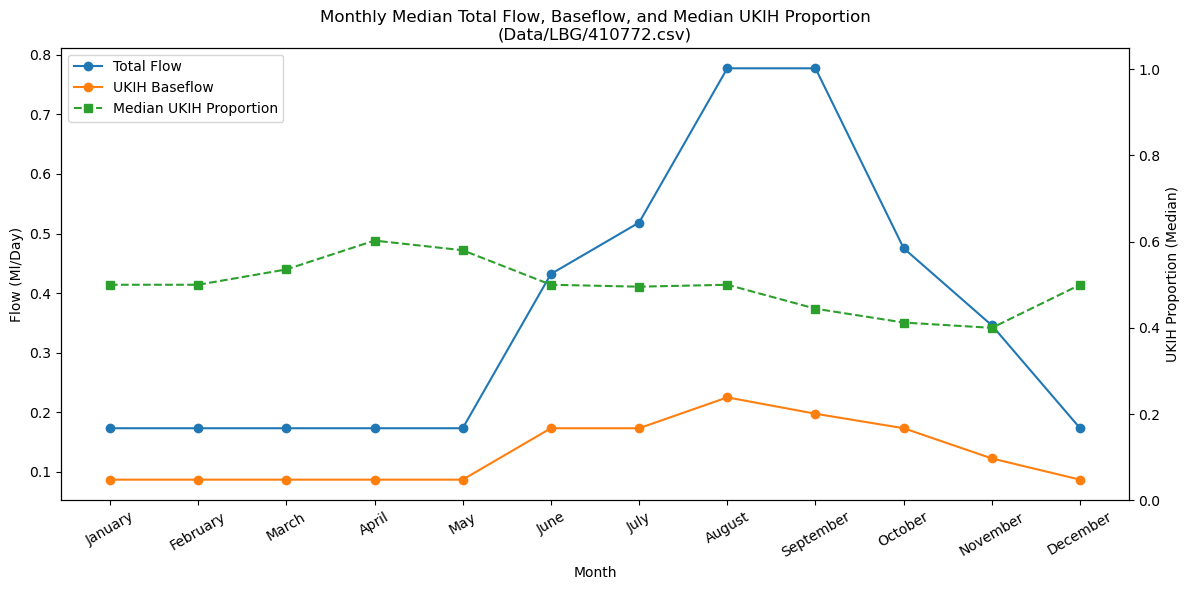

/var/folders/88/nsxfmy89127_4zqn71spykbm0000gn/T/ipykernel_17570/496128054.py:61: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



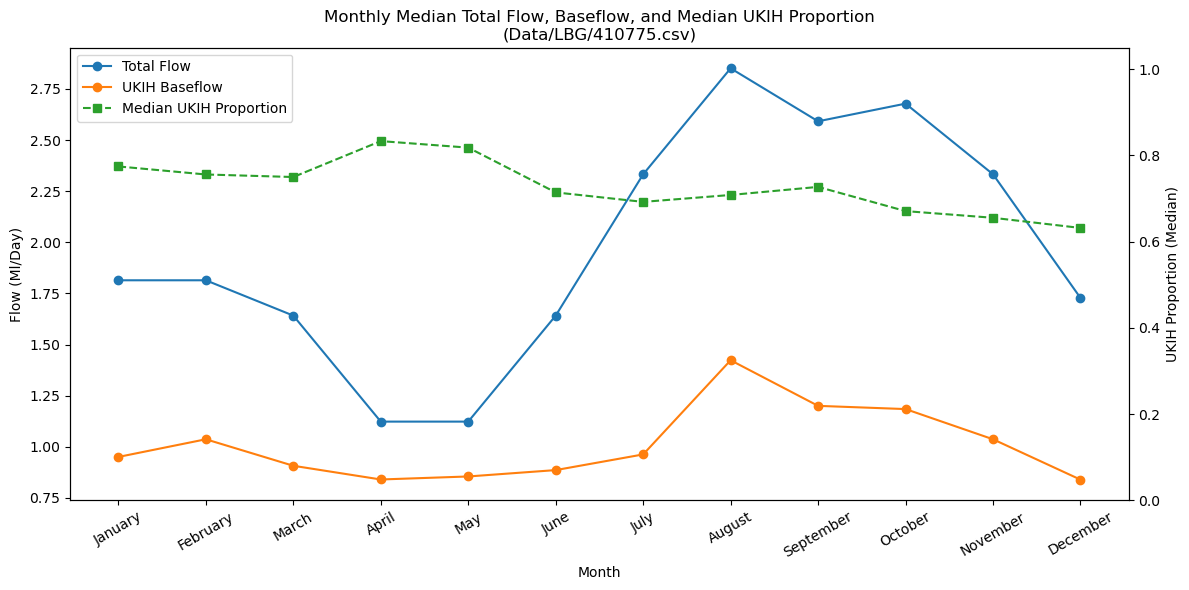

/var/folders/88/nsxfmy89127_4zqn71spykbm0000gn/T/ipykernel_17570/496128054.py:61: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



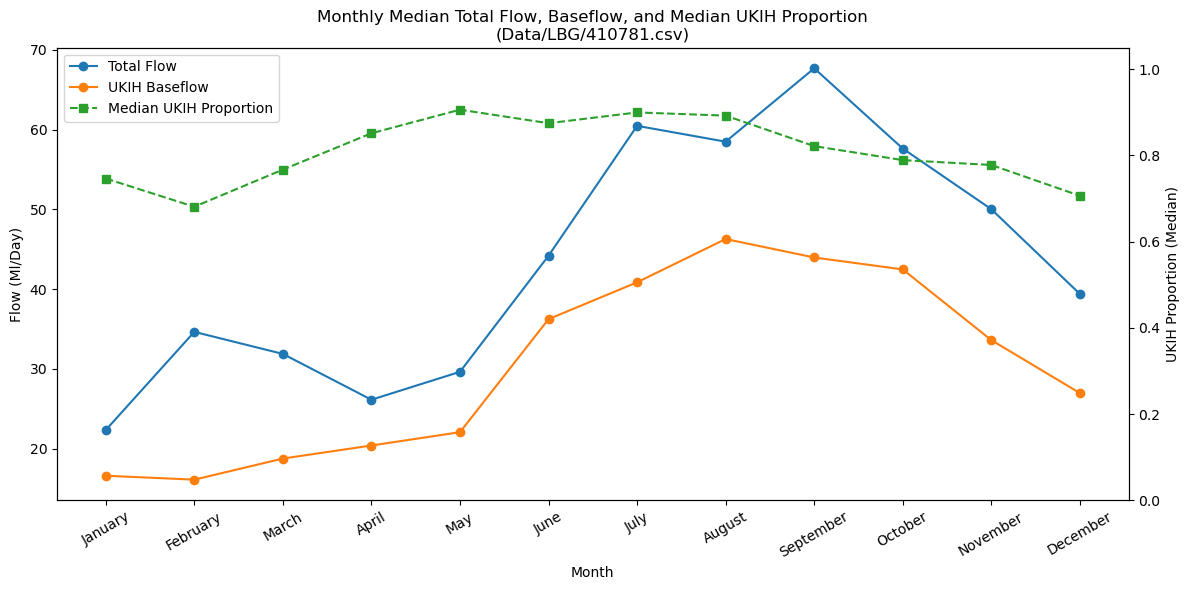

/var/folders/88/nsxfmy89127_4zqn71spykbm0000gn/T/ipykernel_17570/496128054.py:61: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



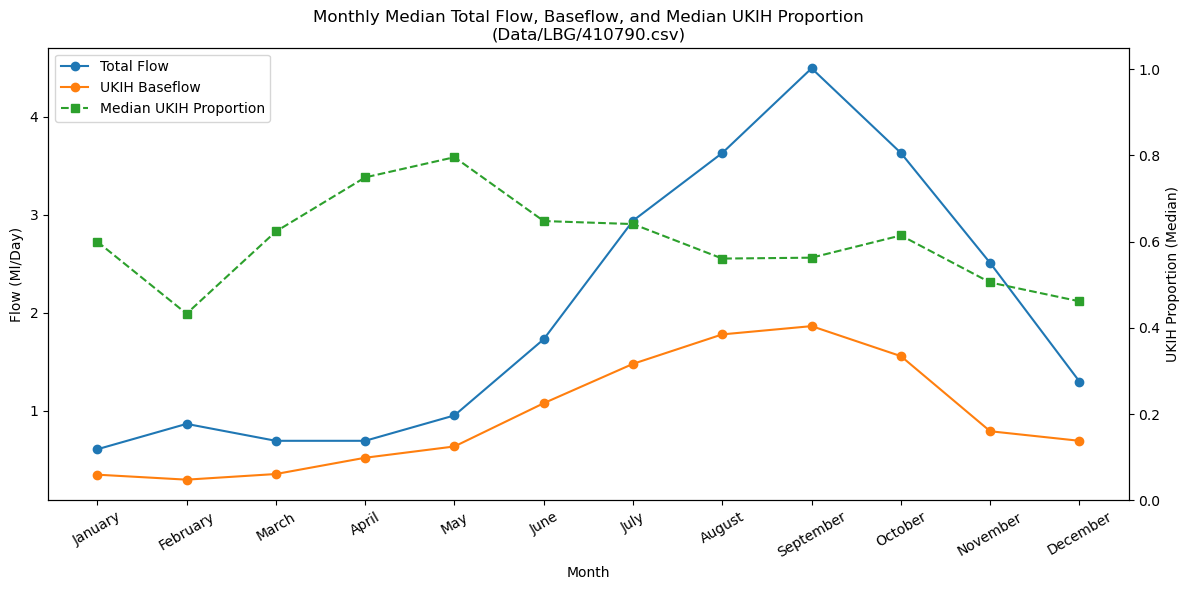

In [71]:
import os

data_dir = "Data/LBG/"
csv_files = [
    os.path.join(data_dir, fname)
    for fname in os.listdir(data_dir)
    if fname.lower().endswith(".csv")
]

for csv_path in sorted(csv_files):
    plot_monthly_medians_suite(
        [csv_path],  # Wrapped in a list since function expects a list of files
        flow_col='Flow (ML/d)',
        date_col='Date',
        ukih_col_name='UKIH',
        figsize=(12,6)
    )